In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
params_dict_mu = {
    'input_size': 3,
    'hidden_size': 10,
    'output_size': 3,
    'ode_nn': ((50, "tanh"), (50, "tanh")),
    'readout_nn': ((50, "tanh"), (50, "tanh")),
    'enc_nn': ((50, "tanh"), (50, "tanh")),
    'use_rnn': False,
    'options': {'which_loss': 'easy'},
    "input_coords": np.arange(3),
    "output_coords": np.arange(3),
    "signature_coords": np.arange(3)
}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from models import get_ckpt_model, NJODE
model_mu = NJODE(**params_dict_mu).to(device)
optimizer = torch.optim.Adam(model_mu.parameters())
get_ckpt_model("../data/saved_models/id-57/best_checkpoint/", model_mu, optimizer, device)
model_mu.eval()

using loss: easy
neuralODE use input scaling with tanh
use residual network: input_size=3, output_size=10
use residual network: input_size=10, output_size=3


NJODE(
  (ode_f): ODEFunc(
    (f): Sequential(
      (0): Linear(in_features=15, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (encoder_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=3, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (readout_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=10, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
 

In [3]:
params_dict_vol = {
    'input_size': 9,
    'hidden_size': 10,
    'output_size': 9,
    'ode_nn': ((50, "tanh"), (50, "tanh")),
    'readout_nn': ((50, "tanh"), (50, "tanh")),
    'enc_nn': ((50, "tanh"), (50, "tanh")),
    'use_rnn': False,
    'options': {'which_loss': 'easy_vol'},
    "input_coords": np.arange(9),
    "output_coords": np.arange(9),
    "signature_coords": np.arange(9)
}
model_vol = NJODE(**params_dict_vol).to(device)
optimizer_vol = torch.optim.Adam(model_vol.parameters())
get_ckpt_model("../data/saved_models/id-54/last_checkpoint/", model_vol, optimizer_vol, device)
model_vol.eval()

using loss: easy_vol
neuralODE use input scaling with tanh
use residual network: input_size=9, output_size=10
use residual network: input_size=10, output_size=9


NJODE(
  (ode_f): ODEFunc(
    (f): Sequential(
      (0): Linear(in_features=21, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (encoder_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=9, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
      (6): Linear(in_features=50, out_features=10, bias=True)
    )
  )
  (readout_map): FFNN(
    (ffnn): Sequential(
      (0): Linear(in_features=10, out_features=50, bias=True)
      (1): Tanh()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=50, out_features=50, bias=True)
      (4): Tanh()
      (5): Dropout(p=0, inplace=False)
 

In [4]:
mu_data=np.load("../data/training_data/OrnsteinUhlenbeckMultiDimensional-46/data.npy")

In [5]:
 def generate_next_value( X_t, mu_t, sigma_t, delta_t):
    """
    Generate the next value in the time series using the Euler-Maruyama scheme.

    :param X_t: current value tensor of shape (batch_size, d)
    :param mu_t: drift coefficient tensor of shape (batch_size, d)
    :param sigma_t: diffusion coefficient tensor of shape ( d, d)
    :param delta_t: time difference float
    :return: next value tensor of shape (batch_size, d)
    """
    delta_Wt = torch.randn_like(X_t) * np.sqrt(delta_t)

    X_t_next = X_t + mu_t * delta_t + delta_Wt @ sigma_t

    return X_t_next

In [3]:
import data_utils

param_dict: {'epochs': [200], 'batch_size': [200], 'save_every': [5], 'learning_rate': [0.001], 'test_size': [0.2], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((50, 'tanh'), (50, 'tanh'))], 'readout_nn': [((50, 'tanh'), (50, 'tanh'))], 'enc_nn': [((50, 'tanh'), (50, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 'solver': ['euler'], 'weight': [0.5], 'weight_decay': [1.0], 'dataset': ['BlackScholes', 'Heston', 'OrnsteinUhlenbeck'], 'dataset_id': [None], 'plot': [True], 'evaluate': [True], 'paths_to_plot': [(0, 1, 2, 3, 4)]}
param_dict: {'epochs': [100], 'batch_size': [20], 'save_every': [10], 'learning_rate': [0.001], 'test_size': [0.2], 'training_size': [200, 400, 800, 1600, 3200, 6400, 12800], 'seed': [398], 'hidden_size': [10], 'bias': [True], 'dropout_rate': [0.1], 'ode_nn': [((10, 'tanh'), (10, 'tanh'))], 'readout_nn': [((10, 'tanh'), (10, 'tanh'))], 'enc_nn': [((10, 'tanh'), (10, 'tanh'))], 'use_rnn': [False], 'func_appl_X': [[]], 's

In [4]:
dataset_metadata = data_utils.load_metadata(stock_model_name="OrnsteinUhlenbeckMultiDimensional", time_id=46)
stockmodel = data_utils._STOCK_MODELS[dataset_metadata['model_name']](**dataset_metadata)

In [3]:
speed = torch.tensor([[0.3, 0, 0], [0, 0.3, 0], [0, 0, 0.3]], dtype=torch.float)
mean = torch.tensor([[1.2, 1.0, 1.5]], dtype=torch.float)

In [9]:
def next_cond_exp( y, delta_t, speed, mean):
    exp_delta = torch.matrix_exp(-speed * delta_t)
    return y @ exp_delta + mean @ (torch.eye(3) - exp_delta)

In [10]:
times=np.array([])
time_ptr = np.array([0])
obs_idx = torch.tensor([],dtype=torch.long)
start_Z = torch.tensor(np.zeros((9,)), dtype=torch.float).unsqueeze(0)
Z = torch.tensor([], dtype=torch.float)
delta_t=0.01
X= torch.tensor([], dtype=torch.float)
start_X = torch.tensor(mu_data[0,:,0], dtype=torch.float).unsqueeze(0)
n_obs_ot=torch.tensor([0], dtype=torch.float)


first_term = torch.tensor([], dtype=torch.float)
second_term = torch.tensor([], dtype=torch.float)
third_term = torch.tensor([], dtype=torch.float)


X_cond_true = torch.tensor([], dtype=torch.float)
X_cond_model = torch.tensor([], dtype=torch.float)
X_cond = torch.tensor([], dtype=torch.float)


for i in range(1, 101):
    T=delta_t*i
    mu_pred=model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"][-1]
    X_cond_model = torch.cat((X_cond_model, mu_pred))
    
    #print(model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot))

    if torch.isnan(mu_pred).any():
        break
        #print(model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot))
    if i==1: 
        X_t=start_X
    elif i==2: 
        X_t = X[i-2,:].unsqueeze(0)
        X_t_minus = start_X
        Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
        Z=torch.cat((Z,Z_tensor.view(1,-1)))
    else:
        X_t = X[i-2,:].unsqueeze(0)
        X_t_minus = X[i-3, :].unsqueeze(0)
        Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
        Z=torch.cat((Z,Z_tensor.view(1,-1)))
    
    """
    X_t = X[i-1,:].unsqueeze(0)
    if i>1:
        X_t_minus = X[i-2, :].unsqueeze(0)
        Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
        Z=torch.cat((Z,Z_tensor.view(1,-1))) 
    """  
        
    #print(Z)
    X_cond_true = torch.cat((X_cond_true, torch.tensor(stockmodel.next_cond_exp(X_t.detach().numpy(),delta_t,T), dtype=torch.float)))
    
    X_cond = torch.cat((X_cond,next_cond_exp(X_t, delta_t, speed, mean)))
    sigma_pred=model_vol.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot )["pred"][-1]

    #print(model_vol.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot ))
    mu_hat_t = (mu_pred - X_t)/delta_t
    sigma_hat_t = sigma_pred.view(3,3)/np.sqrt(delta_t)




    first_term = torch.cat((first_term,X_t))
    second_term = torch.cat((second_term,mu_hat_t*delta_t))
    third_term = torch.cat((third_term,torch.randn_like(X_t)@sigma_hat_t*np.sqrt(delta_t)))
    #X_next = X_t +  mu_hat_t*delta_t + torch.randn_like(X_t)@sigma_hat_t*np.sqrt(delta_t)



    #X_next = generate_next_value(X_t, mu_hat_t, sigma_hat_t, delta_t)
    #print(X_next, X_t, mu_hat_t*delta_t,  torch.randn_like(X_t)@sigma_pred.view(3,3))

    X= torch.cat((X, torch.tensor(mu_data[0,:,i], dtype=torch.float).unsqueeze(0)))
    times=np.append(times, delta_t*i)
    time_ptr = np.append(time_ptr, i)
    obs_idx=torch.cat((obs_idx, torch.tensor([0], dtype=torch.long)))
    n_obs_ot+=1

In [2]:
from sklearn.model_selection import train_test_split

In [59]:
train_idx, val_idx = train_test_split(np.arange(dataset_metadata["nb_paths"]), test_size=0.0002, random_state=42)

In [60]:
data_val = data_utils.IrregularDataset(model_name="OrnsteinUhlenbeckMultiDimensional", time_id=46, idx=val_idx)

In [61]:
dl_val = DataLoader(  # class to iterate over validation data
    dataset=data_val, collate_fn= data_utils.CustomCollateFnGen(None)[0],
    shuffle=False, batch_size=len(data_val))

In [62]:
dl_val

In [63]:
for i, b in enumerate(dl_val):  # iterate over dataloader for validation set
    times = b["times"]
    time_ptr = b["time_ptr"]
    X = b["X"].to(device)
    M = b["M"]
    if M is not None:
        M = M.to(device)
    start_M = b["start_M"]
    if start_M is not None:
        start_M = start_M.to(device)

    start_X = b["start_X"].to(device)
    obs_idx = b["obs_idx"]
    n_obs_ot = b["n_obs_ot"].to(device) 

In [64]:
print(times)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.  ]


In [65]:
print(time_ptr)

[  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198 200]


In [66]:
start_X.shape

torch.Size([2, 3])

In [79]:
X

tensor([[0.9764, 1.4801, 1.9643],
        [1.0215, 1.5369, 2.0289],
        [0.9824, 1.5006, 1.9416],
        [1.0441, 1.5302, 2.0529],
        [0.9587, 1.4742, 1.9039],
        [1.0582, 1.5757, 2.0756],
        [0.9317, 1.4483, 1.8890],
        [1.0841, 1.5902, 2.1238],
        [0.9044, 1.4233, 1.9141],
        [1.0568, 1.5584, 2.0901],
        [0.9020, 1.4294, 1.9068],
        [1.0482, 1.5530, 2.0590],
        [0.8702, 1.4002, 1.8713],
        [1.0112, 1.5204, 1.9913],
        [0.8901, 1.4419, 1.8876],
        [1.0235, 1.5190, 2.0102],
        [0.8994, 1.4351, 1.8751],
        [1.0208, 1.4993, 1.9779],
        [0.8571, 1.4131, 1.8254],
        [1.0714, 1.5700, 2.0518],
        [0.8604, 1.4500, 1.8023],
        [1.0753, 1.6067, 2.0702],
        [0.8949, 1.4557, 1.8352],
        [1.0528, 1.5884, 2.0174],
        [0.9148, 1.4484, 1.8650],
        [0.9956, 1.5476, 1.9870],
        [0.8949, 1.4094, 1.8157],
        [0.9425, 1.4574, 1.8558],
        [0.8995, 1.4436, 1.8224],
        [0.968

In [76]:
X_res=X.view(100,2,3).permute(1,2,0)

In [77]:
X_res.shape

torch.Size([2, 3, 100])

In [78]:
X_res

tensor([[[0.9764, 0.9824, 0.9587, 0.9317, 0.9044, 0.9020, 0.8702, 0.8901,
          0.8994, 0.8571, 0.8604, 0.8949, 0.9148, 0.8949, 0.8995, 0.8974,
          0.9168, 0.9581, 0.9734, 0.9995, 0.9976, 0.9917, 1.0080, 1.0266,
          1.0381, 1.0414, 1.0218, 1.0375, 1.0119, 1.0109, 1.0774, 1.0655,
          1.0638, 1.0903, 1.0591, 1.0627, 1.0572, 1.0469, 1.0356, 1.0215,
          1.0372, 1.0639, 1.0451, 1.0797, 1.1058, 1.1073, 1.0959, 1.1101,
          1.1424, 1.1711, 1.1156, 1.1012, 1.1152, 1.1396, 1.1284, 1.1085,
          1.0879, 1.0728, 1.0592, 1.0648, 1.1005, 1.0726, 1.0702, 1.0663,
          1.0543, 1.0732, 1.1087, 1.1364, 1.1424, 1.1322, 1.1255, 1.1131,
          1.1158, 1.1411, 1.1214, 1.1396, 1.1416, 1.1508, 1.1418, 1.1978,
          1.1983, 1.2141, 1.1665, 1.1812, 1.2238, 1.2174, 1.1936, 1.2096,
          1.2336, 1.2386, 1.2377, 1.2222, 1.2200, 1.2039, 1.2359, 1.2848,
          1.3039, 1.3001, 1.3418, 1.3140],
         [1.4801, 1.5006, 1.4742, 1.4483, 1.4233, 1.4294, 1.4002, 1.4

In [57]:
obs_idx

tensor([ 0,  1,  2,  ..., 97, 98, 99])

In [58]:
print(obs_idx.shape)

torch.Size([10000])


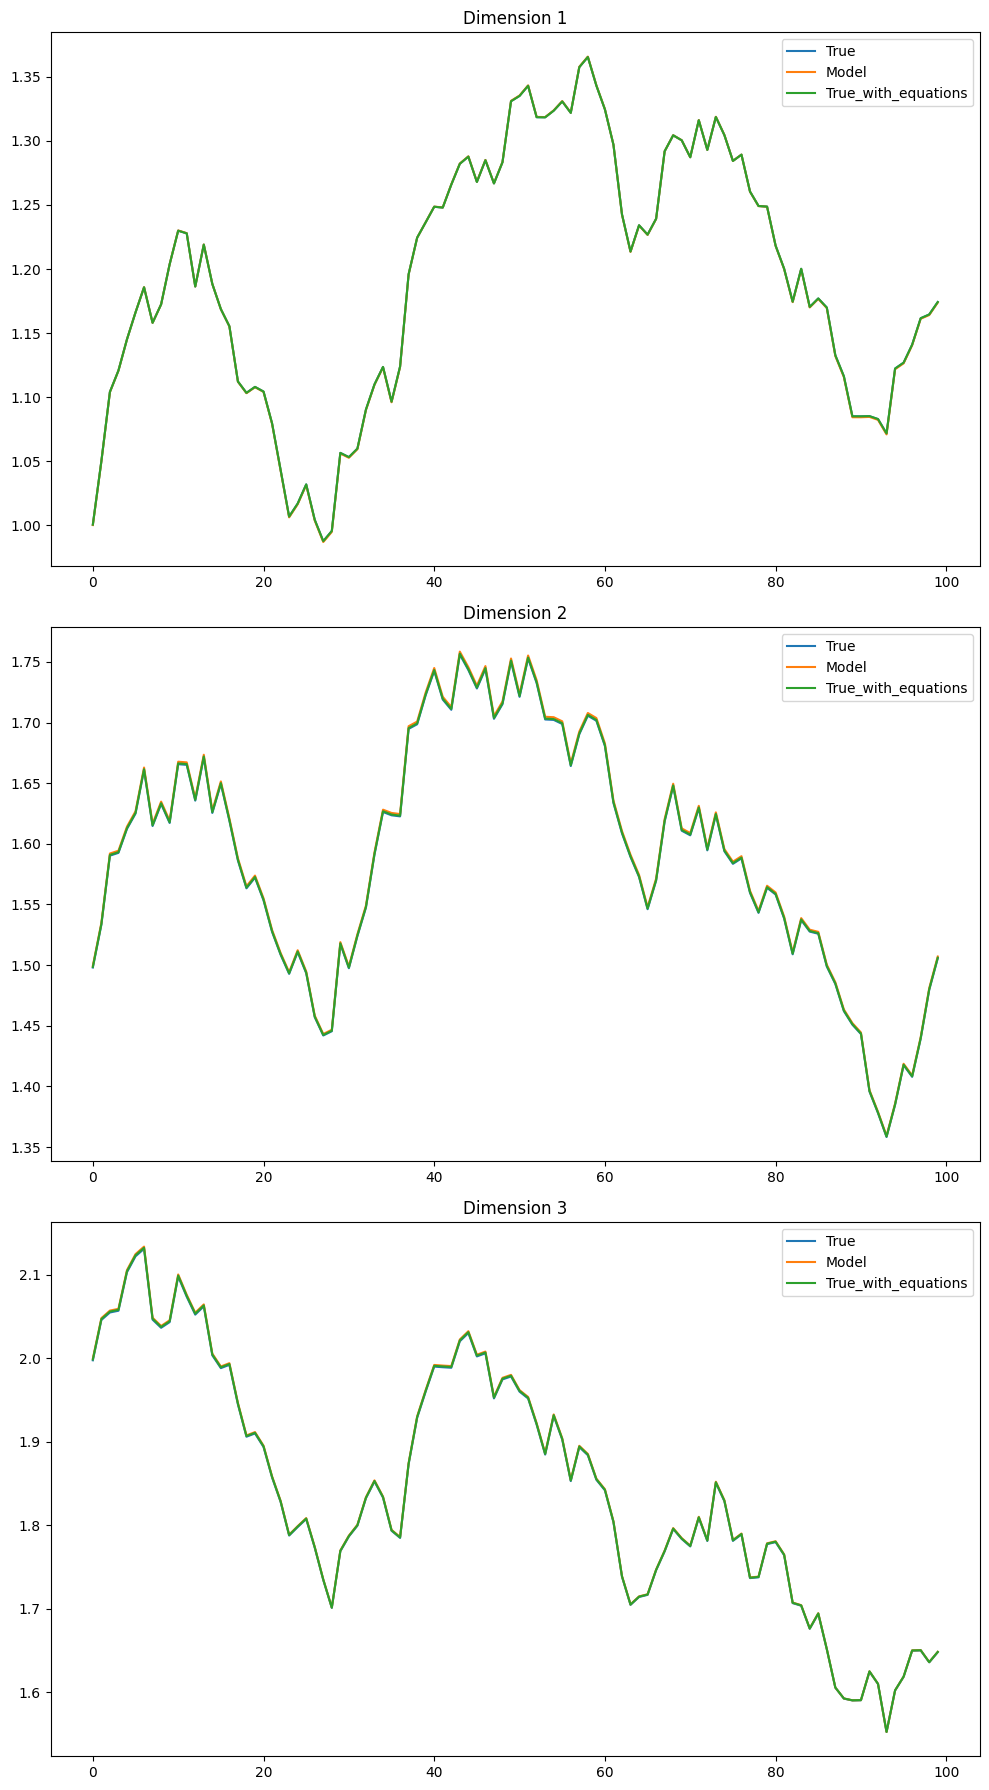

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

for i in range(3):
    axs[i].plot(X_cond_true[:, i].detach().numpy(), label='True')
    axs[i].plot(X_cond_model[:,i].detach().numpy(), label='Model')
    axs[i].plot(X_cond[:,i].detach().numpy(), label='True_with_equations')
    axs[i].legend()
    axs[i].set_title(f'Dimension {i + 1}')

plt.tight_layout()
plt.show()

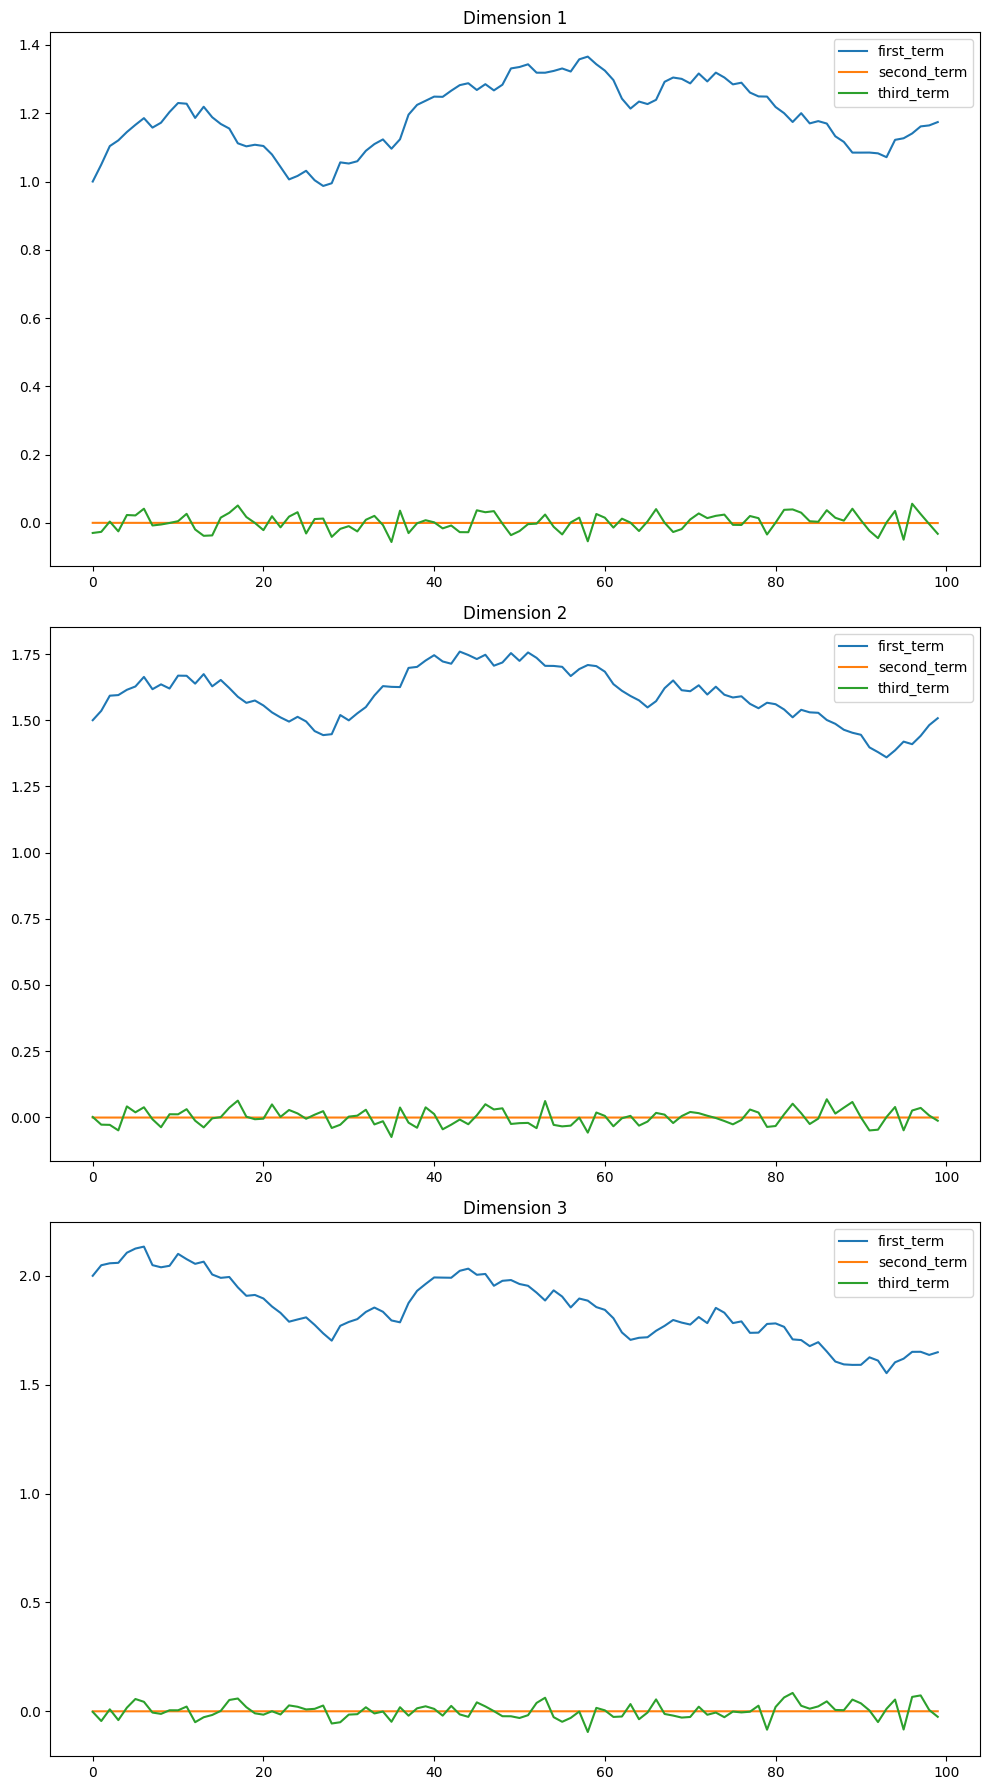

In [12]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

for i in range(3):
    axs[i].plot(first_term[:, i].detach().numpy(), label='first_term')
    axs[i].plot(second_term[:,i].detach().numpy(), label='second_term')
    axs[i].plot(third_term[:,i].detach().numpy(), label='third_term')
    axs[i].legend()
    axs[i].set_title(f'Dimension {i + 1}')

plt.tight_layout()
plt.show()

In [50]:
times=np.array([])
time_ptr = np.array([0])
obs_idx = torch.tensor([],dtype=torch.long)
start_Z = torch.tensor(np.zeros((9,)), dtype=torch.float).unsqueeze(0)
Z = torch.tensor(np.zeros((9,)), dtype=torch.float).unsqueeze(0)
delta_t=0.01
X= torch.tensor([], dtype=torch.float)
start_X = torch.tensor(mu_data[0,:,0], dtype=torch.float).unsqueeze(0)
n_obs_ot=torch.tensor([0], dtype=torch.float)


first_term = torch.tensor([], dtype=torch.float)
second_term = torch.tensor([], dtype=torch.float)
third_term = torch.tensor([], dtype=torch.float)


X_cond_true = torch.tensor([], dtype=torch.float)
X_cond_model = torch.tensor([], dtype=torch.float)
X_cond = torch.tensor([], dtype=torch.float)

for i in range(1, 101):

    T=delta_t*i
    mu_pred=model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"][-1]
    X_cond_model = torch.cat((X_cond_model, mu_pred))

    #print(model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot))

    if torch.isnan(mu_pred).any():
        break
        #print(model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot))
    if i==1:
        X_t=start_X
    elif i==2:
        X_t = X[i-2,:].unsqueeze(0)
        X_t_minus = start_X
        Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
        Z=torch.cat((Z,Z_tensor.view(1,-1)))
    else:
        X_t = X[i-2,:].unsqueeze(0)
        X_t_minus = X[i-3, :].unsqueeze(0)
        Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
        Z=torch.cat((Z,Z_tensor.view(1,-1)))

    """
    X_t = X[i-1,:].unsqueeze(0)
    if i>1:
        X_t_minus = X[i-2, :].unsqueeze(0)
        Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
        Z=torch.cat((Z,Z_tensor.view(1,-1))) 
    """

    #print(Z)
    X_cond_true = torch.cat((X_cond_true, torch.tensor(stockmodel.next_cond_exp(X_t.detach().numpy(),delta_t,T), dtype=torch.float)))

    X_cond = torch.cat((X_cond,next_cond_exp(X_t, delta_t, speed, mean)))
    sigma_pred=model_vol.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot )["pred"][-1]

    #print(model_vol.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot ))
    mu_hat_t = (mu_pred - X_t)/delta_t
    sigma_hat_t = sigma_pred.view(3,3)/np.sqrt(delta_t)




    first_term = torch.cat((first_term,X_t))
    second_term = torch.cat((second_term,mu_hat_t*delta_t))
    third_term = torch.cat((third_term,torch.randn_like(X_t)@sigma_hat_t*np.sqrt(delta_t)))
    X_next = X_t +  mu_hat_t*delta_t + torch.randn_like(X_t)@sigma_hat_t*np.sqrt(delta_t)



    X_next = generate_next_value(X_t, mu_hat_t, sigma_hat_t, delta_t)
    #print(X_next, X_t, mu_hat_t*delta_t,  torch.randn_like(X_t)@sigma_pred.view(3,3))

    #X= torch.cat((X, torch.tensor(mu_data[0,:,i], dtype=torch.float).unsqueeze(0)))
    X= torch.cat((X, X_next))
    times=np.append(times, delta_t*i)
    time_ptr = np.append(time_ptr, i)
    obs_idx=torch.cat((obs_idx, torch.tensor([0], dtype=torch.long)))
    n_obs_ot+=1

In [51]:
X.shape

torch.Size([100, 3])

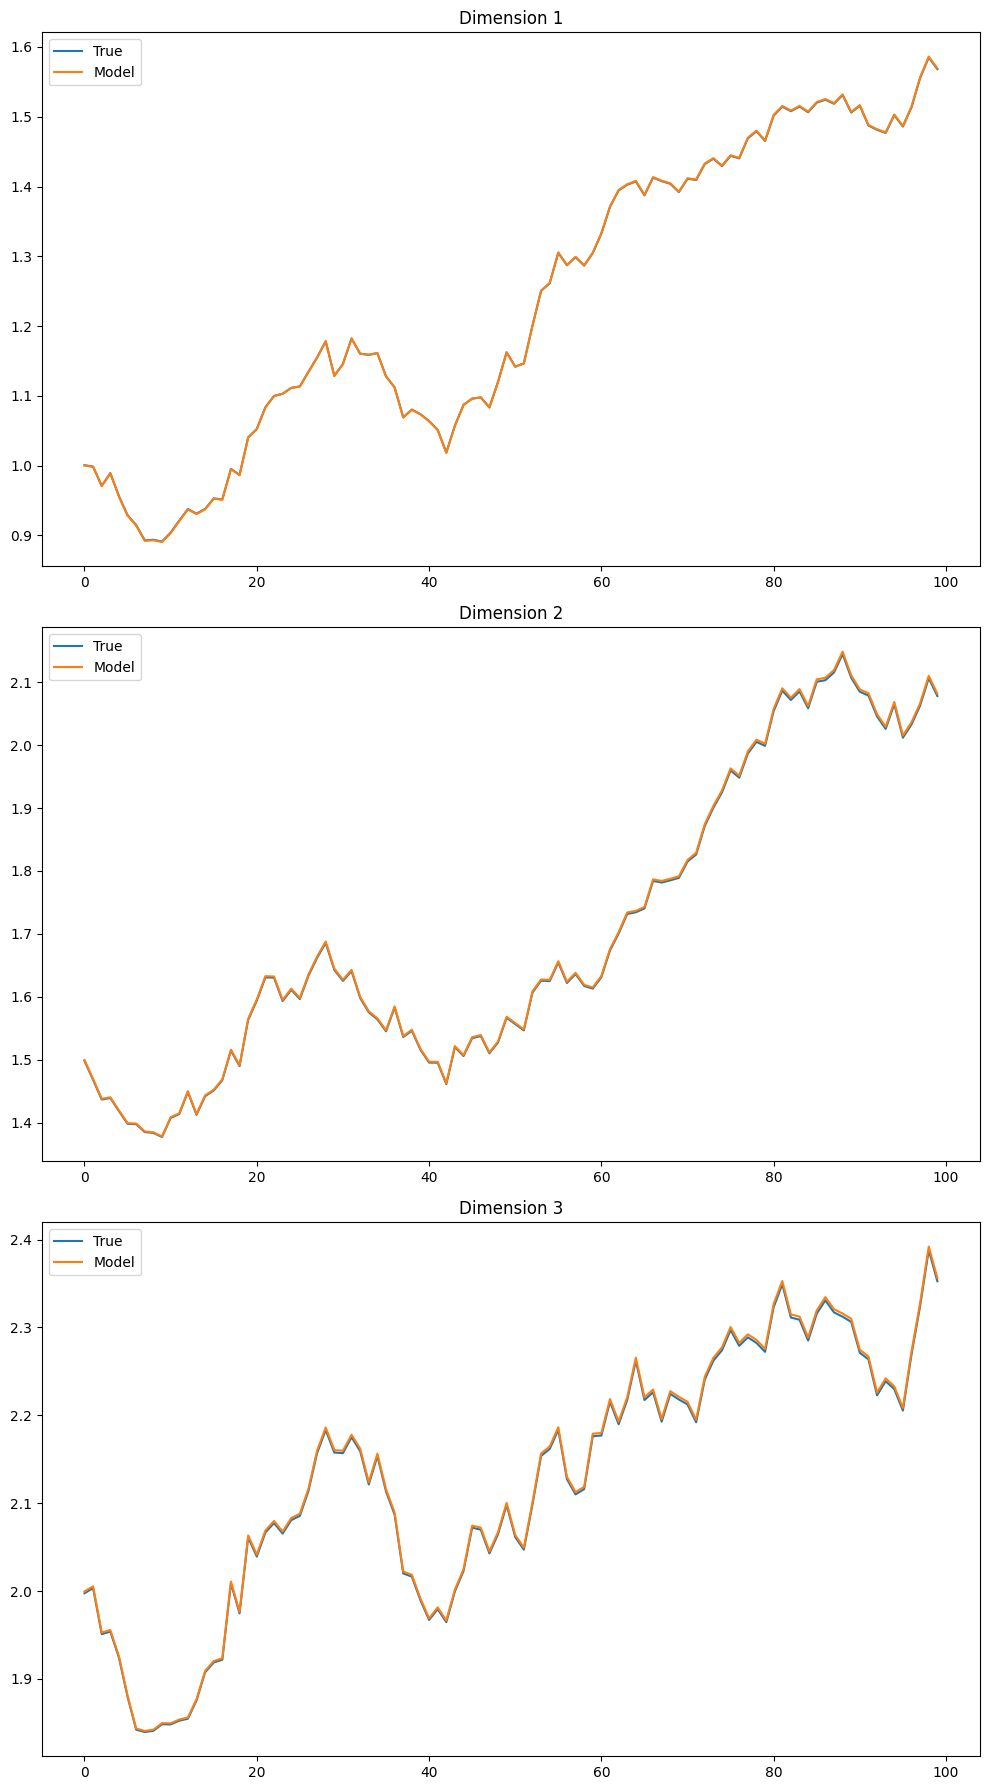

In [86]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

for i in range(3):
    axs[i].plot(X_cond_true[:, i].detach().numpy(), label='True')
    axs[i].plot(X_cond_model[:,i].detach().numpy(), label='Model')
   
    axs[i].legend()
    axs[i].set_title(f'Dimension {i + 1}')

plt.tight_layout()
plt.show()

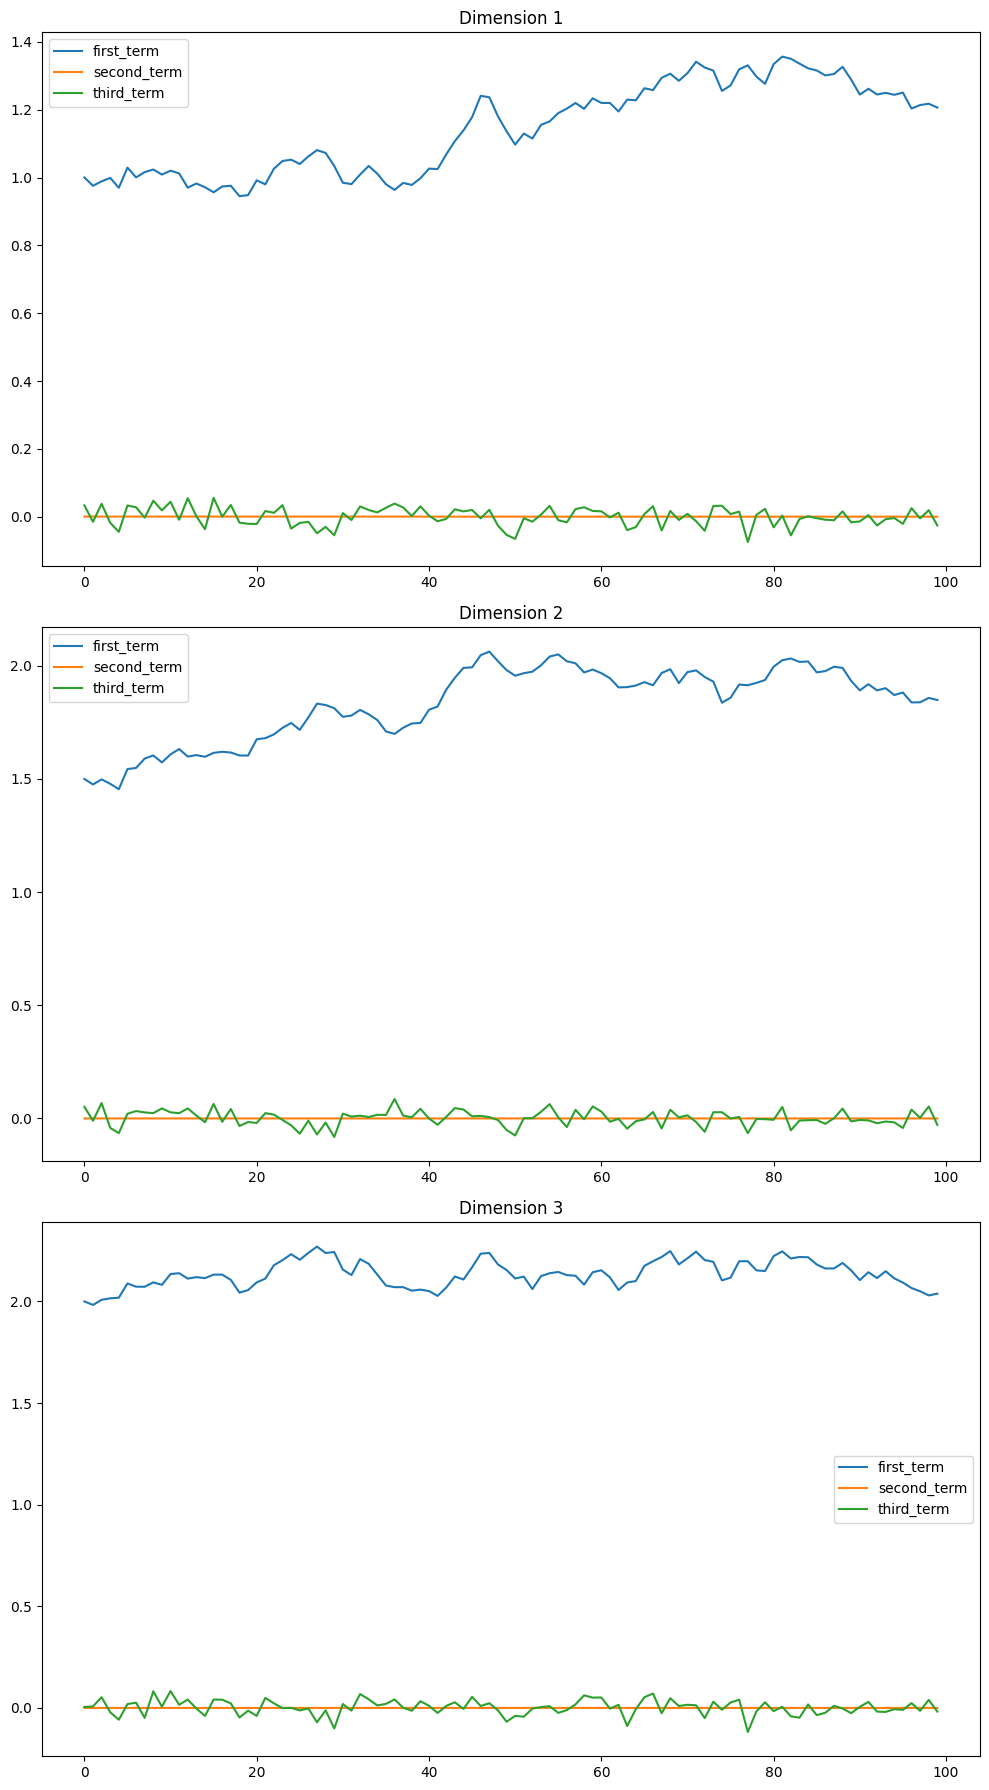

In [91]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

for i in range(3):
    axs[i].plot(first_term[:, i].detach().numpy(), label='first_term')
    axs[i].plot(second_term[:,i].detach().numpy(), label='second_term')
    axs[i].plot(third_term[:,i].detach().numpy(), label='third_term')
    axs[i].legend()
    axs[i].set_title(f'Dimension {i + 1}')

plt.tight_layout()
plt.show()

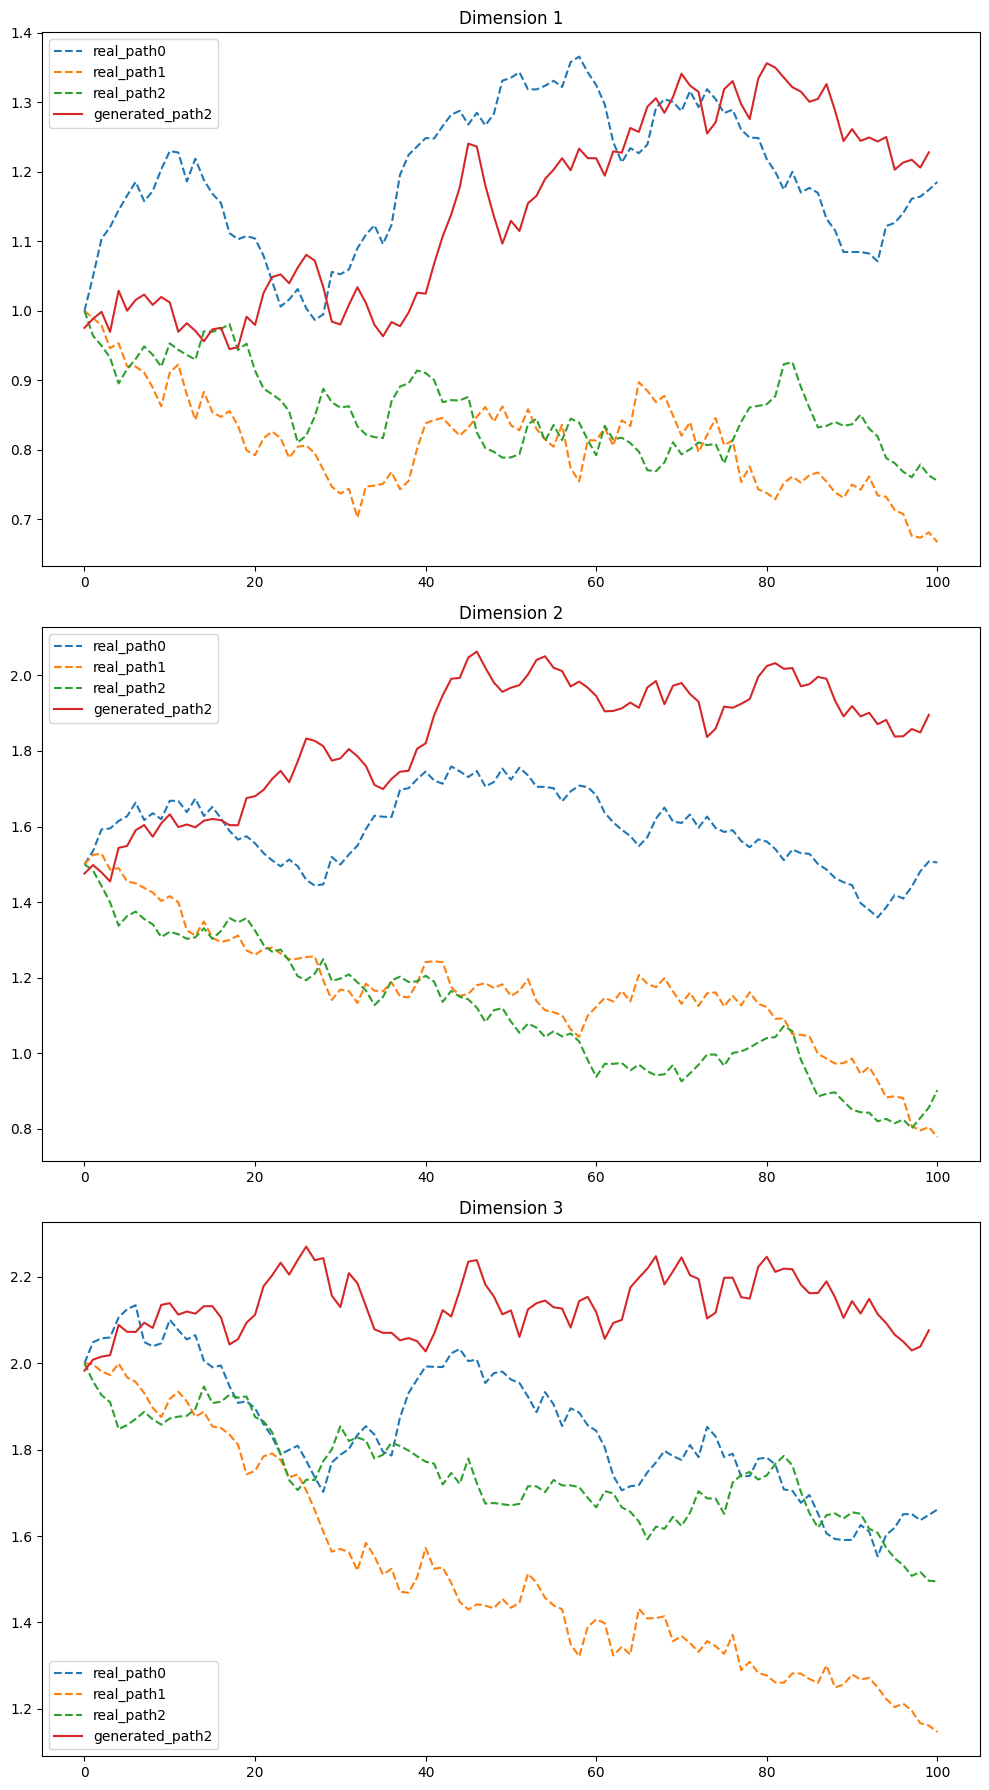

In [90]:
# Plotting each dimension separately
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

for i in range(3):
    real_path = mu_data[:, i, :].T
    generated_path = X[:, i]

    for j in range(3):
        axs[i].plot(real_path[:, j], label=f'real_path{j}', linestyle="--")

    axs[i].plot(generated_path.unsqueeze(1).detach().numpy(), label=f'generated_path{j}')
    axs[i].legend()
    axs[i].set_title(f'Dimension {i + 1}')

plt.tight_layout()
plt.show()

In [11]:
x0=np.arange(0.01,0.01,0.01)

In [12]:
x0

array([], dtype=float64)

In [14]:
time_ptr = np.array([])

In [16]:
start_i=40
delta_t=0.01
times=np.arange(1*delta_t, start_i*delta_t, delta_t)
time_ptr = np.arange(0, start_i, 1)

In [17]:
times.shape

(39,)

In [18]:
time_ptr.shape

(40,)

In [25]:
mu_data.shape

(10000, 3, 101)

In [34]:
def create_Z_dataset(X, dt=1):
    # Calculate dX
    dX = X[:, dt:] - X[:, :-dt]

    # Initialize Z with the correct shape
    dim, time_steps = dX.shape
    Z = np.zeros((dim, dim, time_steps))

    # Compute Z_t for each time step
    for t in range(time_steps):
        Z[:, :, t] = np.outer(dX[:, t], dX[:, t])

    # Flatten Z along the first two dimensions
    Z_flat = Z.reshape(dim * dim, time_steps)

    return Z_flat


In [54]:
start_Z.shape

torch.Size([1, 9])

In [55]:
Z.shape

torch.Size([9, 39])

In [56]:
start_X.shape

torch.Size([1, 3])

In [57]:
X.shape

torch.Size([3, 39])

In [58]:
start_i=40
delta_t=0.01  
times=np.arange(1*delta_t, start_i*delta_t, delta_t)
time_ptr = np.arange(0, start_i, 1) 
obs_idx = torch.tensor(np.zeros((start_i-1,)),dtype=torch.long)
start_Z = torch.tensor(np.zeros((9,)), dtype=torch.float).unsqueeze(0)
Z = torch.tensor(create_Z_dataset(mu_data[0,:,:start_i]).T, dtype=torch.float)
X= torch.tensor(mu_data[0,:,1:start_i].T, dtype=torch.float)
start_X = torch.tensor(mu_data[0,:,0], dtype=torch.float).unsqueeze(0)
n_obs_ot=torch.tensor([0], dtype=torch.float)


first_term = torch.tensor([], dtype=torch.float)
second_term = torch.tensor([], dtype=torch.float)
third_term = torch.tensor([], dtype=torch.float)


X_cond_true = torch.tensor([], dtype=torch.float)
X_cond_model = torch.tensor([], dtype=torch.float)
X_cond = torch.tensor([], dtype=torch.float)

for i in range(start_i,101):

    T=delta_t*i
    mu_pred=model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"][-1]
    X_cond_model = torch.cat((X_cond_model, mu_pred))

    #print(model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot))

    
    if i==1:
        X_t=start_X
    elif i==2:
        X_t = X[i-2,:].unsqueeze(0)
        X_t_minus = start_X
        Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
        Z=torch.cat((Z,Z_tensor.view(1,-1)))
    else:
        X_t = X[i-2,:].unsqueeze(0)
        X_t_minus = X[i-3, :].unsqueeze(0)
        Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
        Z=torch.cat((Z,Z_tensor.view(1,-1)))

    """
    X_t = X[i-1,:].unsqueeze(0)
    if i>1:
        X_t_minus = X[i-2, :].unsqueeze(0)
        Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
        Z=torch.cat((Z,Z_tensor.view(1,-1))) 
    """

    #print(Z)
    X_cond_true = torch.cat((X_cond_true, torch.tensor(stockmodel.next_cond_exp(X_t.detach().numpy(),delta_t,T), dtype=torch.float)))

    X_cond = torch.cat((X_cond,next_cond_exp(X_t, delta_t, speed, mean)))
    sigma_pred=model_vol.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot )["pred"][-1]

    #print(model_vol.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot ))
    mu_hat_t = (mu_pred - X_t)/delta_t
    sigma_hat_t = sigma_pred.view(3,3)/np.sqrt(delta_t)




    first_term = torch.cat((first_term,X_t))
    second_term = torch.cat((second_term,mu_hat_t*delta_t))
    third_term = torch.cat((third_term,torch.randn_like(X_t)@sigma_hat_t*np.sqrt(delta_t)))
    X_next = X_t +  mu_hat_t*delta_t + torch.randn_like(X_t)@sigma_hat_t*np.sqrt(delta_t)



    X_next = generate_next_value(X_t, mu_hat_t, sigma_hat_t, delta_t)
    #print(X_next, X_t, mu_hat_t*delta_t,  torch.randn_like(X_t)@sigma_pred.view(3,3))

    #X= torch.cat((X, torch.tensor(mu_data[0,:,i], dtype=torch.float).unsqueeze(0)))
    X= torch.cat((X, X_next))
    times=np.append(times, delta_t*i)
    time_ptr = np.append(time_ptr, i)
    obs_idx=torch.cat((obs_idx, torch.tensor([0], dtype=torch.long)))
    n_obs_ot+=1

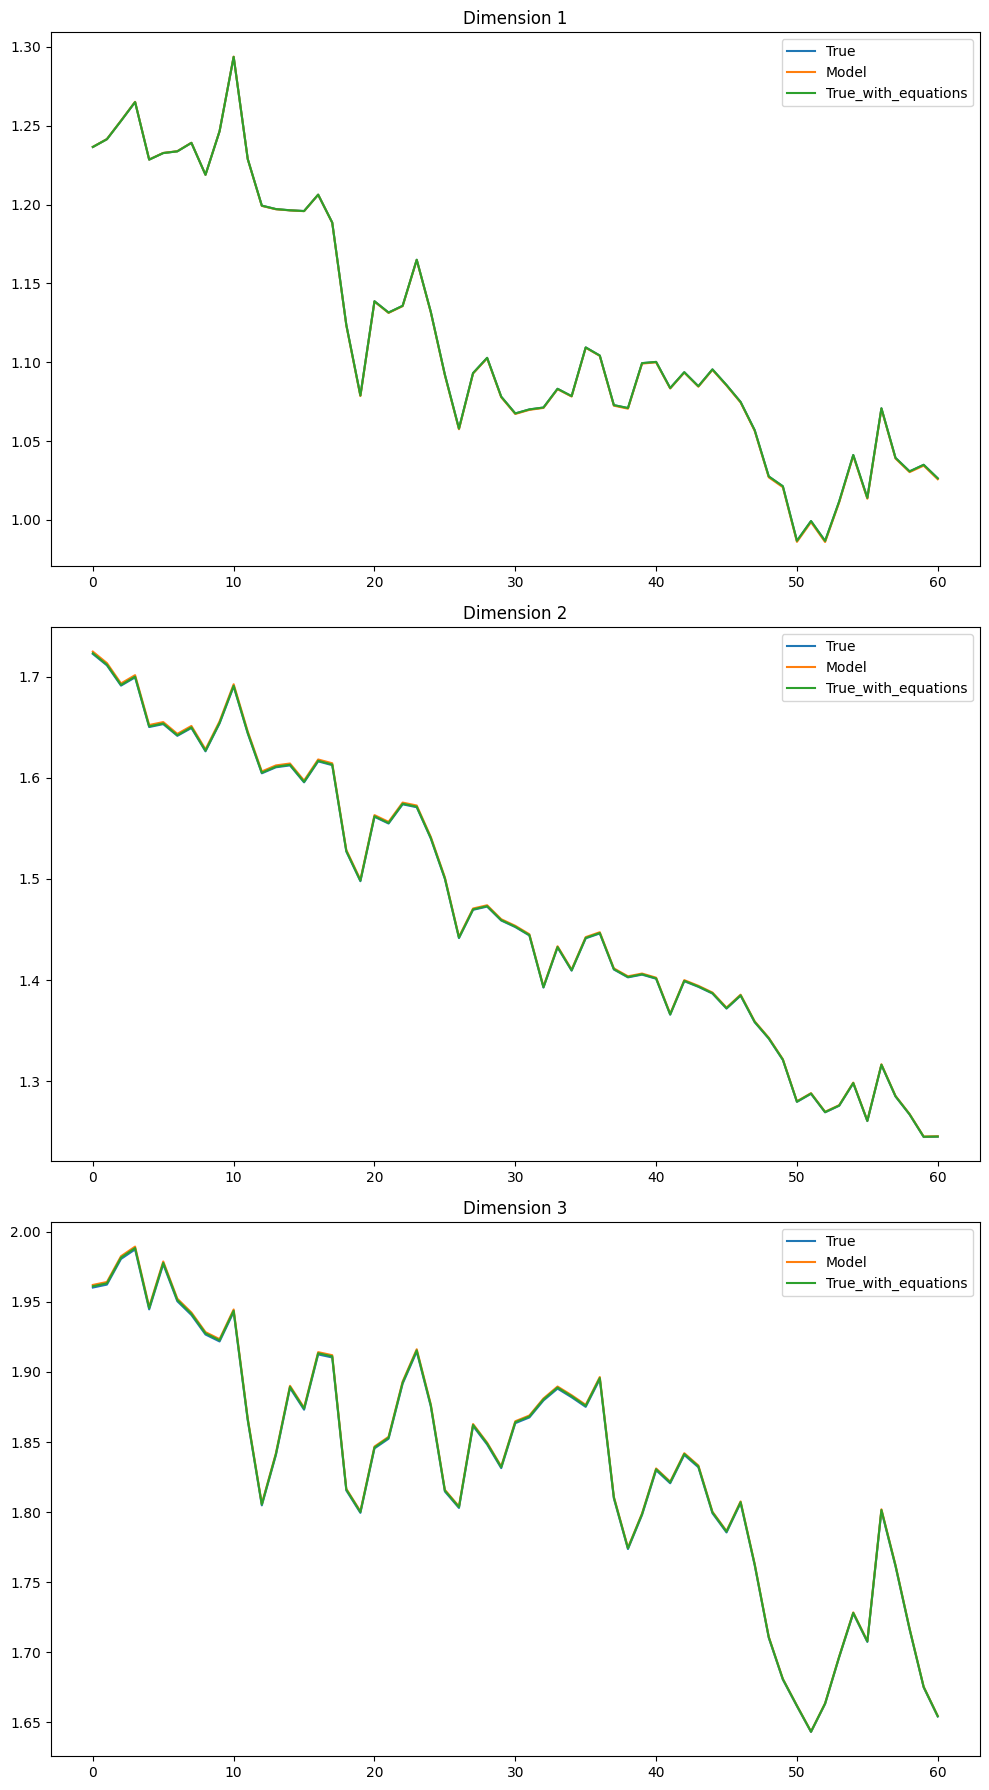

In [59]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

for i in range(3):
    axs[i].plot(X_cond_true[:, i].detach().numpy(), label='True')
    axs[i].plot(X_cond_model[:,i].detach().numpy(), label='Model')
    axs[i].plot(X_cond[:,i].detach().numpy(), label='True_with_equations')
    axs[i].legend()
    axs[i].set_title(f'Dimension {i + 1}')

plt.tight_layout()
plt.show()

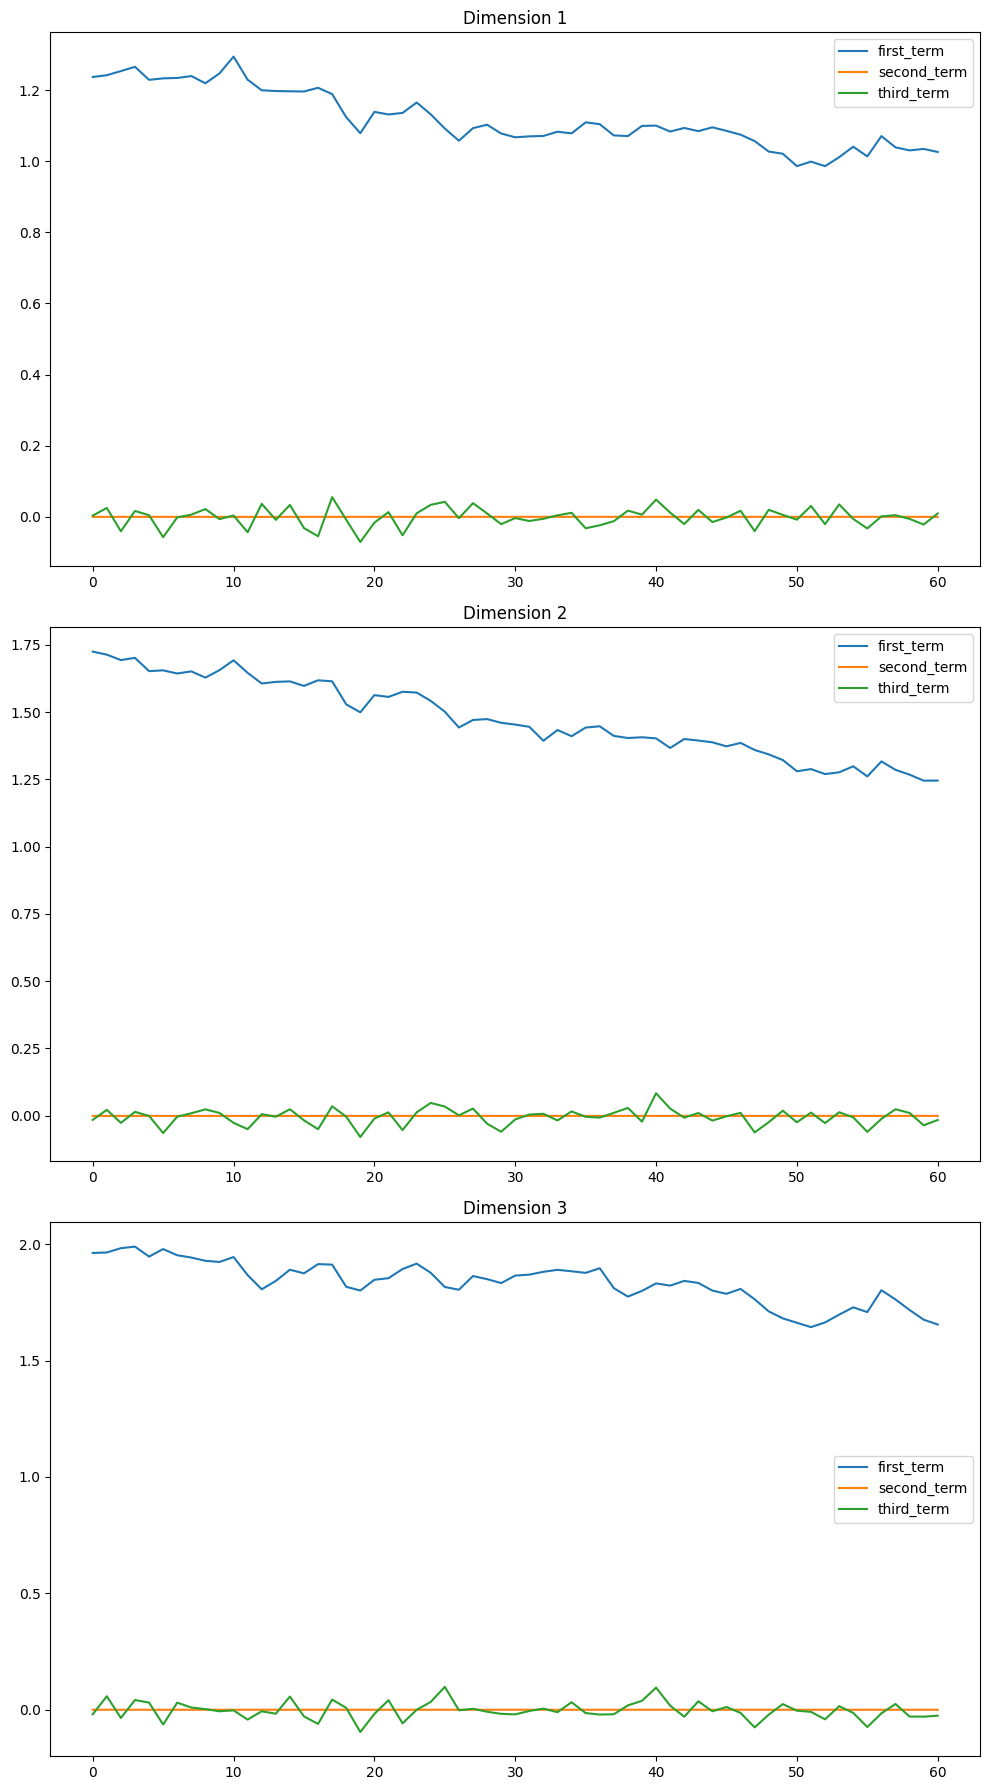

In [60]:
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

for i in range(3):
    axs[i].plot(first_term[:, i].detach().numpy(), label='first_term')
    axs[i].plot(second_term[:,i].detach().numpy(), label='second_term')
    axs[i].plot(third_term[:,i].detach().numpy(), label='third_term')
    axs[i].legend()
    axs[i].set_title(f'Dimension {i + 1}')

plt.tight_layout()
plt.show()

In [63]:
X_new = torch.cat((torch.tensor([1.0, 1.5, 2.0]).unsqueeze(0),X), dim=0)

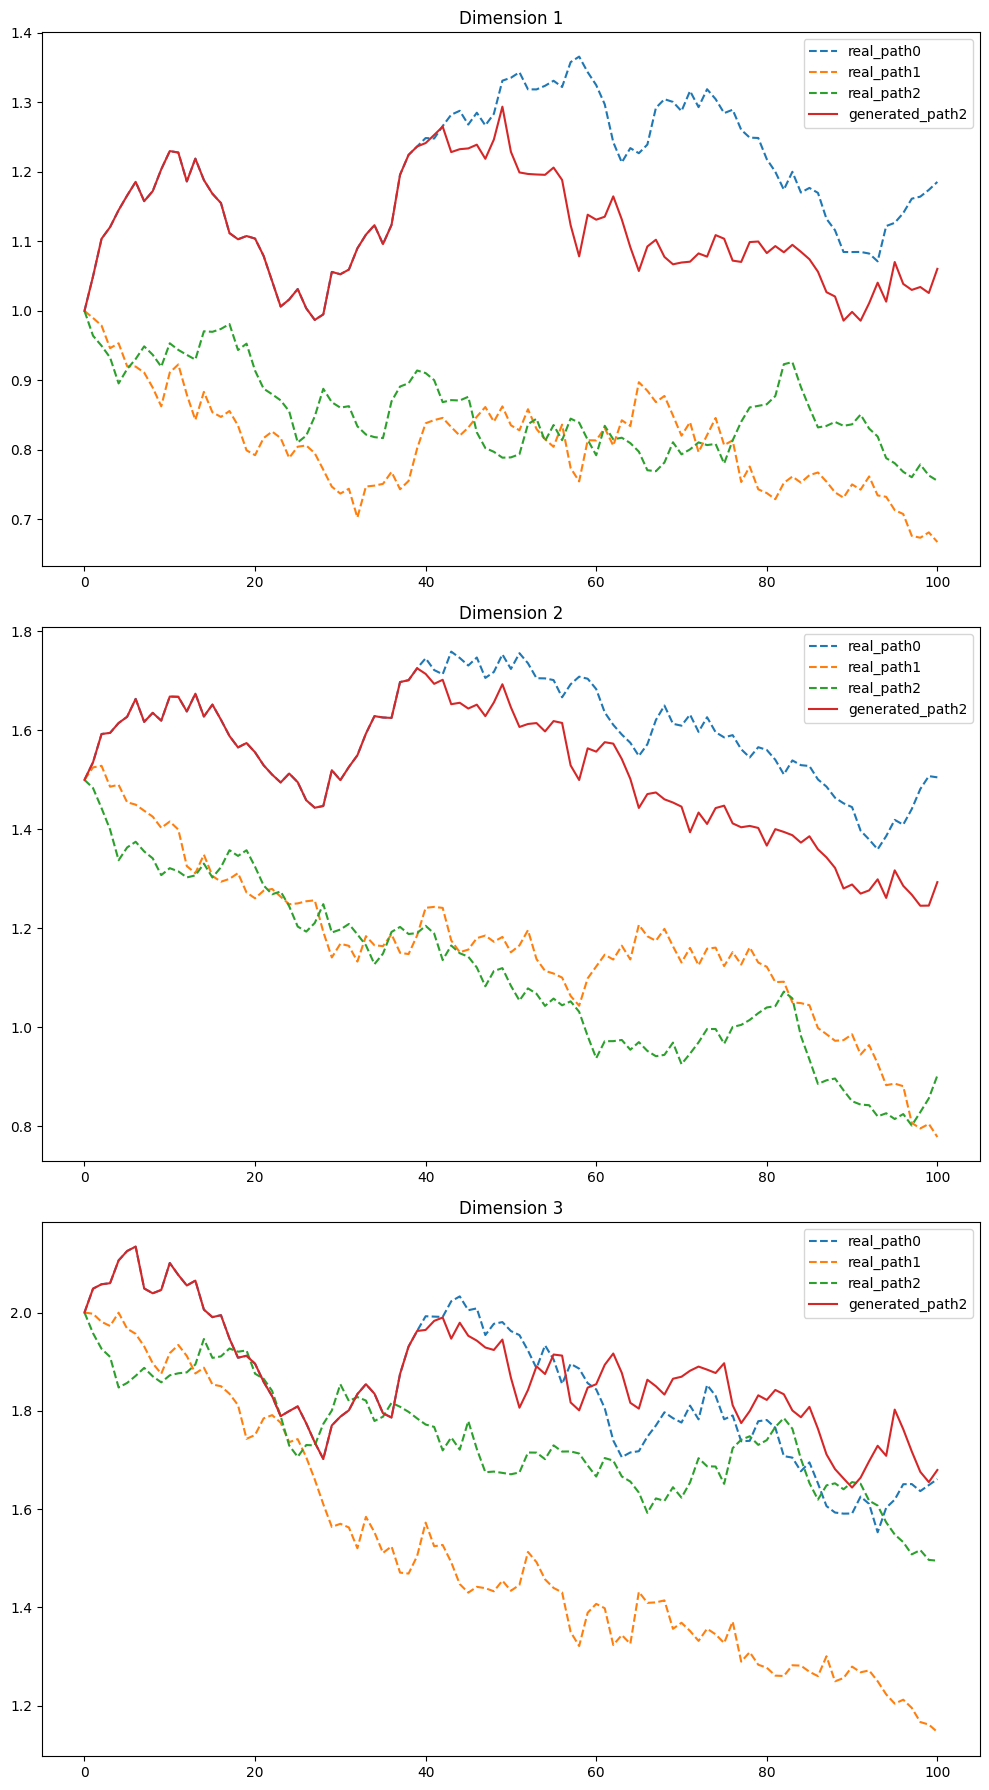

In [64]:
# Plotting each dimension separately
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

for i in range(3):
    real_path = mu_data[:, i, :].T
    generated_path = X_new[:, i]

    for j in range(3):
        axs[i].plot(real_path[:, j], label=f'real_path{j}', linestyle="--")

    axs[i].plot(generated_path.unsqueeze(1).detach().numpy(), label=f'generated_path{j}')
    axs[i].legend()
    axs[i].set_title(f'Dimension {i + 1}')

plt.tight_layout()
plt.show()

In [13]:
import numpy as np
from scipy.linalg import expm, solve_continuous_lyapunov
from scipy.optimize import minimize

def loglike_ou(params, paths, dt):
    """
    Negative log-likelihood for full OU.
    params: flat vector containing [vec(κ), μ (d,), vech(Σ) lower-triangular]
    paths: (M, N, d)
    """
    M, N, d = paths.shape

    # unpack
    kappa = params[:d*d].reshape(d, d)
    mu     = params[d*d:d*d + d]
    # lower-tri Σ elements:
    tril_indices = np.tril_indices(d)
    Sigma = np.zeros((d, d))
    Sigma[tril_indices] = params[d*d + d:]
    Sigma = Sigma + Sigma.T - np.diag(np.diag(Sigma))

    A = expm(-kappa * dt)
    B = (np.eye(d) - A) @ mu
    # Continuous Lyapunov solve for C:
    # Integral_0^dt e^{-κs} Σ e^{-κᵀs} ds = solve_continuous_lyapunov(κ, -Σ) - e^{-κ dt} solve_continuous_lyapunov(κ, -Σ) e^{-κᵀ dt}
    P = solve_continuous_lyapunov(kappa, -Sigma)
    C = P - A @ P @ A.T

    # accumulate
    ll = 0.0
    invC = np.linalg.inv(C)
    logdetC = np.linalg.slogdet(C)[1]
    for m in range(M):
        for n in range(N-1):
            diff = paths[m,n+1] - (A @ paths[m,n] + B)
            ll += diff @ invC @ diff
    total = 0.5 * M*(N-1)*(logdetC + d*np.log(2*np.pi)) + 0.5 * ll
    return total

def fit_ou_mle(paths, dt, initial=None):
    """
    Fit full OU via MLE.
    paths: (M,N,d)
    dt: sampling interval
    initial: optional dict with keys 'kappa','mu','Sigma' to seed optimizer
    Returns: kappa_hat (dxd), mu_hat (d,), Sigma_hat (dxd)
    """
    M, N, d = paths.shape

    # initial guess
    if initial is None:
        k0 = np.eye(d)
        mu0 = np.mean(paths.reshape(-1, d), axis=0)
        Sigma0 = np.cov(paths.reshape(-1,d).T)
    else:
        k0, mu0, Sigma0 = initial['kappa'], initial['mu'], initial['Sigma']

    # pack params
    params0 = np.concatenate([
        k0.ravel(),
        mu0,
        Sigma0[np.tril_indices(d)]
    ])

    res = minimize(loglike_ou, params0, args=(paths, dt),
                   method='L-BFGS-B')
    p = res.x

    # unpack
    kappa_hat = p[:d*d].reshape(d, d)
    mu_hat    = p[d*d:d*d + d]
    Sigma_hat = np.zeros((d,d))
    Sigma_hat[np.tril_indices(d)] = p[d*d + d:]
    Sigma_hat = Sigma_hat + Sigma_hat.T - np.diag(np.diag(Sigma_hat))

    return kappa_hat, mu_hat, Sigma_hat


In [18]:
if __name__ == "__main__":
    # Example usage:
    dt = 0.01
    real_paths = mu_data[:100,:,:].transpose(0,2,1)
    gen_paths  = generated_paths.detach().numpy()

    # MLE on real
    κ_mle_real, μ_mle_real, Σ_mle_real = fit_ou_mle(real_paths, dt)
    print("MLE real κ:\n", κ_mle_real)
    print("MLE real μ:", μ_mle_real)
    print("MLE real Σ:\n", Σ_mle_real)

    # MLE on generated
    κ_mle_gen, μ_mle_gen, Σ_mle_gen = fit_ou_mle(gen_paths, dt)
    print("MLE gen κ:\n", κ_mle_gen)
    print("MLE gen μ:", μ_mle_gen)
    print("MLE gen Σ:\n", Σ_mle_gen)

MLE real κ:
 [[ 1.00000058e+00  1.46794954e-07  1.60318669e-07]
 [-3.90164013e-08  1.00000047e+00 -5.49750281e-08]
 [-6.52093649e-09 -6.87428773e-08  1.00000046e+00]]
MLE real μ: [1.00679008 1.39954268 1.87290592]
MLE real Σ:
 [[0.02289975 0.02752657 0.02265088]
 [0.02752657 0.034823   0.03248863]
 [0.02265088 0.03248863 0.04503497]]
MLE gen κ:
 [[ 1.00000063e+00 -4.10536068e-07 -4.76936122e-07]
 [ 7.07153524e-07  1.00000175e+00  1.00416173e-06]
 [-4.37665155e-07 -4.16676190e-07  1.00000061e+00]]
MLE gen μ: [0.99810375 1.46420843 1.93509457]
MLE gen Σ:
 [[0.01057637 0.05249611 0.02857375]
 [0.05249611 0.01934205 0.03987735]
 [0.02857375 0.03987735 0.03418314]]


In [6]:
paths = []
for j in range(20):
    times=np.array([])
    time_ptr = np.array([0])
    obs_idx = torch.tensor([],dtype=torch.long)
    start_Z = torch.tensor(np.zeros((9,)), dtype=torch.float).unsqueeze(0)
    Z = torch.tensor([], dtype=torch.float)
    delta_t=0.01
    X= torch.tensor([], dtype=torch.float)
    start_X = torch.tensor(mu_data[0,:,0], dtype=torch.float).unsqueeze(0)
    n_obs_ot=torch.tensor([0], dtype=torch.float)
    
    for i in range(1, 101):
    
        T=delta_t*i
        mu_pred=model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot)["pred"][-1]
        
    
        #print(model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot))
    
        if torch.isnan(mu_pred).any():
            break
            #print(model_mu.get_pred(times, time_ptr, X, obs_idx, delta_t, T, start_X, n_obs_ot))
        if i==1:
            X_t=start_X
        elif i==2:
            X_t = X[i-2,:].unsqueeze(0)
            X_t_minus = start_X
            Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
            Z=torch.cat((Z,Z_tensor.view(1,-1)))
        else:
            X_t = X[i-2,:].unsqueeze(0)
            X_t_minus = X[i-3, :].unsqueeze(0)
            Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
            Z=torch.cat((Z,Z_tensor.view(1,-1)))
    
        """
        X_t = X[i-1,:].unsqueeze(0)
        if i>1:
            X_t_minus = X[i-2, :].unsqueeze(0)
            Z_tensor = (X_t - X_t_minus).T@(X_t-X_t_minus)
            Z=torch.cat((Z,Z_tensor.view(1,-1))) 
        """
    
        #print(Z)
        
    
        sigma_pred=model_vol.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot )["pred"][-1]
    
        #print(model_vol.get_pred(times, time_ptr, Z, obs_idx, delta_t, T, start_Z, n_obs_ot ))
        mu_hat_t = (mu_pred - X_t)/delta_t
        sigma_hat_t = sigma_pred.view(3,3)/np.sqrt(delta_t)
        
        X_next = generate_next_value(X_t, mu_hat_t, sigma_hat_t, delta_t)
        #print(X_next, X_t, mu_hat_t*delta_t,  torch.randn_like(X_t)@sigma_pred.view(3,3))
    
        #X= torch.cat((X, torch.tensor(mu_data[0,:,i], dtype=torch.float).unsqueeze(0)))
        X= torch.cat((X, X_next))
        times=np.append(times, delta_t*i)
        time_ptr = np.append(time_ptr, i)
        obs_idx=torch.cat((obs_idx, torch.tensor([0], dtype=torch.long)))
        n_obs_ot+=1
    X_new = torch.cat((torch.tensor([1.0, 1.5, 2.0]).unsqueeze(0), X), dim=0)    
    paths.append(X_new)
generated_paths=torch.stack(paths)

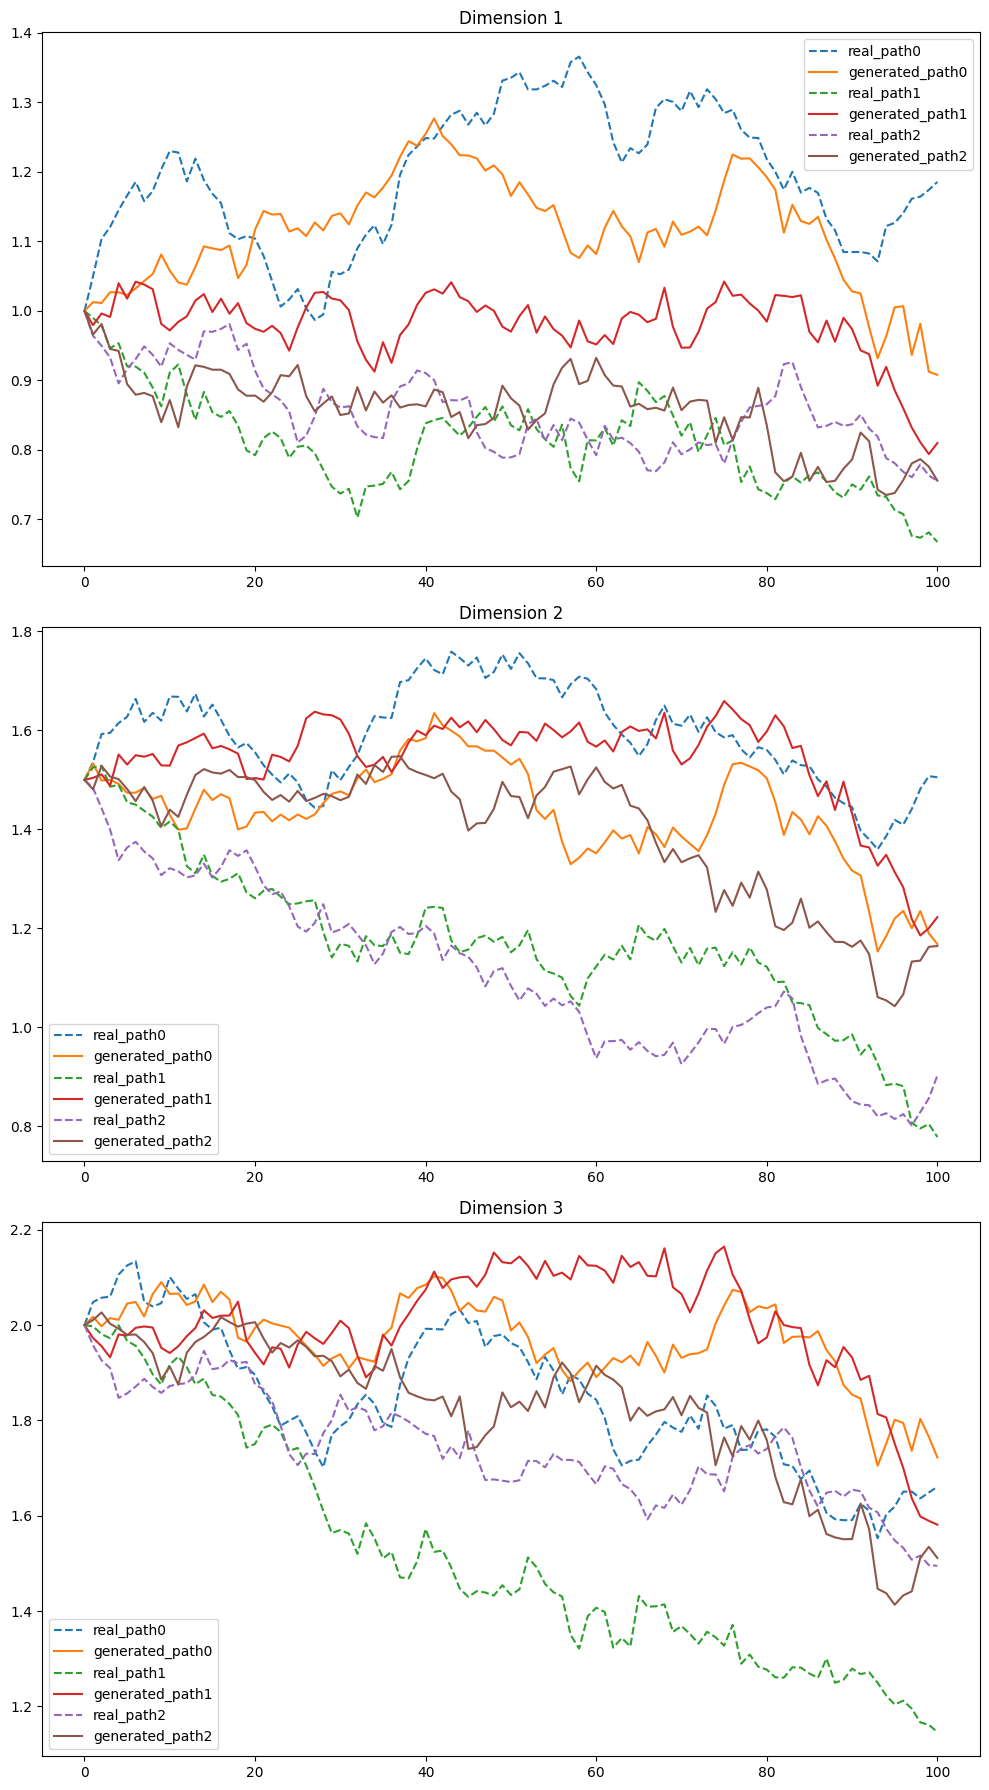

In [67]:
# Plotting each dimension separately
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

for i in range(3):
    real_path = mu_data[:, i, :].T
    generated_path = generated_paths[:,:, i].T

    for j in range(3):
        axs[i].plot(real_path[:, j], label=f'real_path{j}', linestyle="--")
        axs[i].plot(generated_path[:,j].detach().numpy(), label=f'generated_path{j}')
    #axs[i].plot(generated_path.detach().numpy(), label=f'generated_path{j}')
    axs[i].legend()
    axs[i].set_title(f'Dimension {i + 1}')

plt.tight_layout()
plt.show()

In [21]:
from scipy.stats import linregress
def estimate_ou_parameters(paths, delta_t):
    """
    Estimate the parameters of an OU process from given paths.
    
    Parameters:
    - paths: numpy array of shape (num_paths, num_timesteps)
    - delta_t: time increment between observations
    
    Returns:
    - theta: rate of mean reversion
    - mu: long-term mean
    - sigma: volatility
    """
    num_paths, time_steps = paths.shape



    XX = paths[:, :-1]
    YY = paths[:, 1:]

    
    kappa_MLE = np.empty(num_paths)
    theta_MLE = np.empty(num_paths)
    sig_MLE = np.empty(num_paths)
    
    for i in range(num_paths):
        Sx=np.sum(XX[i])
        Sy=np.sum(YY[i])
        Sxx=XX[i]@XX[i]
        Sxy=XX[i]@YY[i]
        Syy=YY[i]@YY[i]
        
        theta_MLE[i] = (Sy*Sxx-Sx*Sxy)/(time_steps*(Sxx-Syy)-(Sx**2-Sx*Sy))
        kappa_MLE[i] = (-1/delta_t)*np.log(Sxy-theta_MLE[i]*Sx-theta_MLE[i]*Sy+time_steps*theta_MLE[i]**2)/(Sxx-2*theta_MLE[i]*Sx+time_steps*theta_MLE[i]**2)
        sigma2_hat = (Syy-2*np.exp(-kappa_MLE[i]*delta_t)*Sxy + np.exp(-2*kappa_MLE[i]*delta_t)*Sxx 
                      -2*theta_MLE[i]*(1-np.exp(-kappa_MLE[i]*delta_t))*(Sy - np.exp(-kappa_MLE[i]*delta_t)*Sx)
                      +time_steps*theta_MLE[i]**2*(1-np.exp(-kappa_MLE[i]*delta_t))**2)/time_steps
        sig_MLE[i] = np.sqrt(sigma2_hat*2*kappa_MLE[i]/(1-np.exp(-2*kappa_MLE[i]*delta_t)))
    
    return np.mean(theta_MLE), np.mean(kappa_MLE), np.mean(sig_MLE)

In [33]:
from scipy.linalg import logm
def estimate_ou_params(paths: np.ndarray, dt: float = 0.01):
    """
    ----------
    paths : ndarray, shape (n_paths, d, n_steps + 1)
        Simulated OU trajectories.
    dt    : float
        Sampling interval of the data.

    Returns
    -------
    k : (d, d) ndarray  
    mu    : (d,)  ndarray   
    Q     : (d, d) ndarray  
    """
    n_paths, d, n_steps_plus1 = paths.shape
    n_steps = n_steps_plus1 - 1

    X0 = paths[:, :, :-1].transpose(0, 2, 1)          
    X1 = paths[:, :,  1:].transpose(0, 2, 1)

    X0 = X0.reshape(-1, d)
    X1 = X1.reshape(-1, d)
    Z    = np.hstack((np.ones((X0.shape[0], 1)), X0))
    beta = np.linalg.lstsq(Z, X1, rcond=None)[0]     
    A    = beta[0]                                    
    Phi  = beta[1:].T                                 


    k = -logm(Phi) / dt                          
    mu    = np.linalg.solve(np.eye(d) - Phi, A)


    resid   = X1 - (A + X0 @ Phi.T)
    Sigma_e = (resid.T @ resid) / resid.shape[0]      
    Q       = Sigma_e / dt                            

    return k, mu, Q


In [ ]:
speed_1, mean_1, volatility_1 = estimate_ou_params(mu_data,0.01)
speed_2, mean_2, volatility_2 = estimate_ou_params(generated_paths.detach().numpy().transpose(0,2,1),0.01)

In [22]:
print("Real data parameters: ") 

print (f"speed: \n {speed_1}")
print(f"mean: \n {mean_1}")
print(f"volatility: \n {volatility_1}")

Real data parameters: 
speed: 
 [[ 3.29073509e-01 -8.29259579e-04  7.37422329e-05]
 [ 2.22775933e-02  4.03457794e-01  5.96747143e-03]
 [ 4.21318158e-02  1.87715045e-02  4.75250211e-01]]
mean: 
 [1.18608738 1.00652584 1.48194427]
volatility: 
 [[0.06003105 0.05506514 0.05999067]
 [0.05506514 0.08252344 0.06499935]
 [0.05999067 0.06499935 0.10991623]]


In [23]:
print("Fake data parameters: ")

print (f"speed: \n {speed_2}")
print(f"mean: \n {mean_2}")
print(f"volatility: \n {volatility_2}")

Fake data parameters: 
speed: 
 [[ 0.47987512  0.98810206 -0.78736921]
 [ 0.34189381  1.33661153 -0.75136523]
 [ 0.50880602  1.02250241 -0.51755396]]
mean: 
 [1.24904377 1.0688241  1.85274453]
volatility: 
 [[0.06660816 0.06194864 0.07074214]
 [0.06194864 0.09173354 0.07928917]
 [0.07074214 0.07928917 0.12733887]]
